In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['avocado.csv']


In [2]:
data=pd.read_csv('../input/avocado.csv')
data2=pd.read_csv('../input/avocado.csv')

In [3]:
new_index = (data['AveragePrice'].sort_values(ascending=False)).index.values
sorted_data = data.reindex(new_index)
sorted_data

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
14125,8,2016-10-30,3.25,16700.94,2325.93,11142.85,0.00,3232.16,3232.16,0.00,0.00,organic,2016,SanFrancisco
17428,37,2017-04-16,3.17,3018.56,1255.55,82.31,0.00,1680.70,1542.22,138.48,0.00,organic,2017,Tampa
14124,7,2016-11-06,3.12,19043.80,5898.49,10039.34,0.00,3105.97,3079.30,26.67,0.00,organic,2016,SanFrancisco
16055,42,2017-03-12,3.05,2068.26,1043.83,77.36,0.00,947.07,926.67,20.40,0.00,organic,2017,MiamiFtLauderdale
16720,18,2017-08-27,3.04,12656.32,419.06,4851.90,145.09,7240.27,6960.97,279.30,0.00,organic,2017,RaleighGreensboro
13037,12,2016-10-02,3.03,3714.71,296.71,2699.80,0.00,718.20,718.20,0.00,0.00,organic,2016,LasVegas
16715,13,2017-10-01,3.00,10741.93,140.46,4331.20,147.11,6123.16,5873.99,249.17,0.00,organic,2017,RaleighGreensboro
16985,18,2017-08-27,3.00,19329.49,10517.41,7907.99,0.00,904.09,900.76,3.33,0.00,organic,2017,SanFrancisco
15814,13,2017-10-01,2.99,2819.87,174.13,703.73,12.01,1930.00,1736.97,193.03,0.00,organic,2017,Jacksonville
14123,6,2016-11-13,2.99,18930.40,6204.65,9341.41,0.00,3384.34,3337.67,46.67,0.00,organic,2016,SanFrancisco


In [4]:
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
Unnamed: 0      18249 non-null int64
Date            18249 non-null object
AveragePrice    18249 non-null float64
Total Volume    18249 non-null float64
4046            18249 non-null float64
4225            18249 non-null float64
4770            18249 non-null float64
Total Bags      18249 non-null float64
Small Bags      18249 non-null float64
Large Bags      18249 non-null float64
XLarge Bags     18249 non-null float64
type            18249 non-null object
year            18249 non-null int64
region          18249 non-null object
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [6]:
data2 = data2[data2.region!='TotalUS']
data2['region'].value_counts()

Houston                338
GrandRapids            338
Nashville              338
Denver                 338
Midsouth               338
SanFrancisco           338
Portland               338
SouthCarolina          338
SouthCentral           338
Tampa                  338
Northeast              338
Detroit                338
BaltimoreWashington    338
Syracuse               338
NorthernNewEngland     338
Columbus               338
Pittsburgh             338
Sacramento             338
RaleighGreensboro      338
LosAngeles             338
HarrisburgScranton     338
PhoenixTucson          338
Atlanta                338
HartfordSpringfield    338
Spokane                338
RichmondNorfolk        338
Orlando                338
Jacksonville           338
Indianapolis           338
NewYork                338
Roanoke                338
MiamiFtLauderdale      338
Charlotte              338
Philadelphia           338
Albany                 338
NewOrleansMobile       338
California             338
W

In [7]:
#data['Total Bags'].value_counts()

Text(0.5, 1.0, 'Average Price Given States')

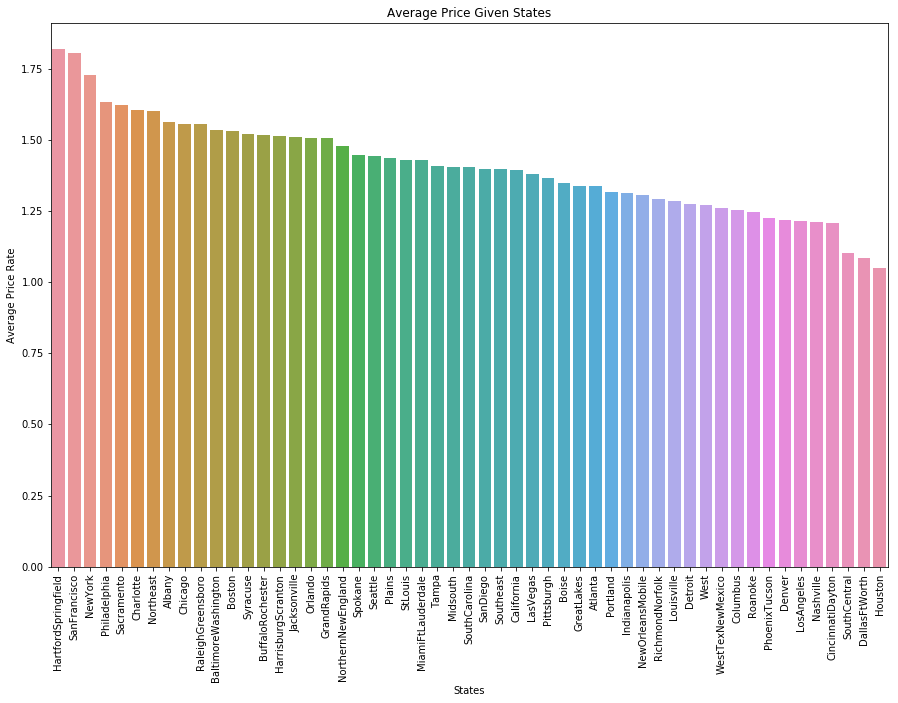

In [8]:
area_list=list(data2.region.unique())
area_averageprice_ratio=[]
for i in area_list:
    x=data2[data2['region']==i]
    area_averageprice_rate=sum(x['AveragePrice'])/len(x)
    area_averageprice_ratio.append(area_averageprice_rate)
    data2['AveragePrice']=data2['AveragePrice'].astype(float)
df=pd.DataFrame({'area_list':area_list,'area_averageprice_ratio':area_averageprice_ratio})
new_index=df['area_averageprice_ratio'].sort_values(ascending=False).index.values
sorted_data=df.reindex(new_index)

plt.figure(figsize=(15,10))
sns.barplot(x=sorted_data['area_list'], y=sorted_data['area_averageprice_ratio'])
plt.xticks(rotation= 90)
plt.xlabel('States')
plt.ylabel('Average Price Rate')
plt.title('Average Price Given States')


Text(0.5, 1.0, 'Most Common Average Price')

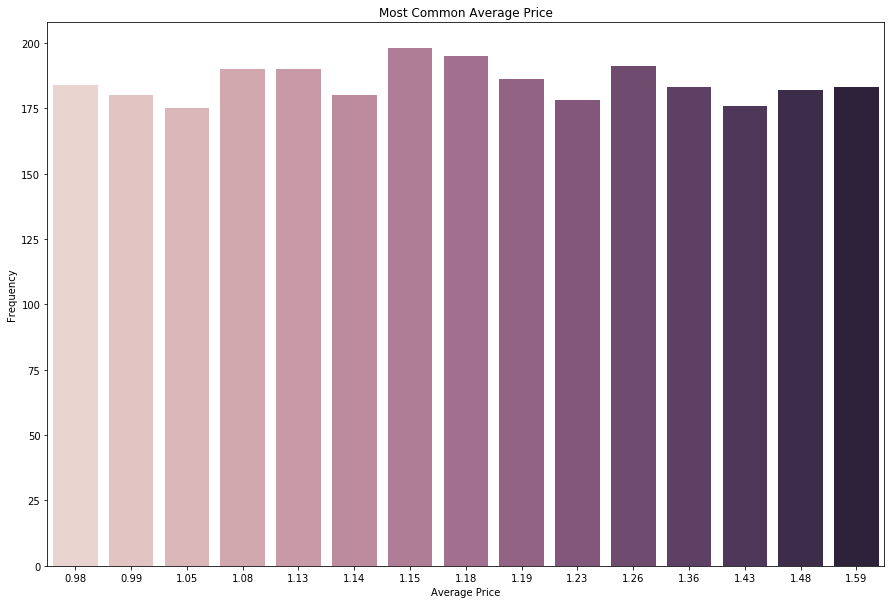

In [9]:
#data['AveragePrice']=data['AveragePrice'].astype(int)

avgprice_count=Counter(data2.AveragePrice)
most_common_type=avgprice_count.most_common(15)
x,y = zip(*most_common_type)
x,y = list(x),list(y)
plt.figure(figsize=(15,10))
ax= sns.barplot(x=x, y=y,palette = sns.cubehelix_palette(len(x)))
plt.xlabel('Average Price')
plt.ylabel('Frequency')
plt.title('Most Common Average Price')

Text(0.5, 1.0, 'Average Total Price Given States')

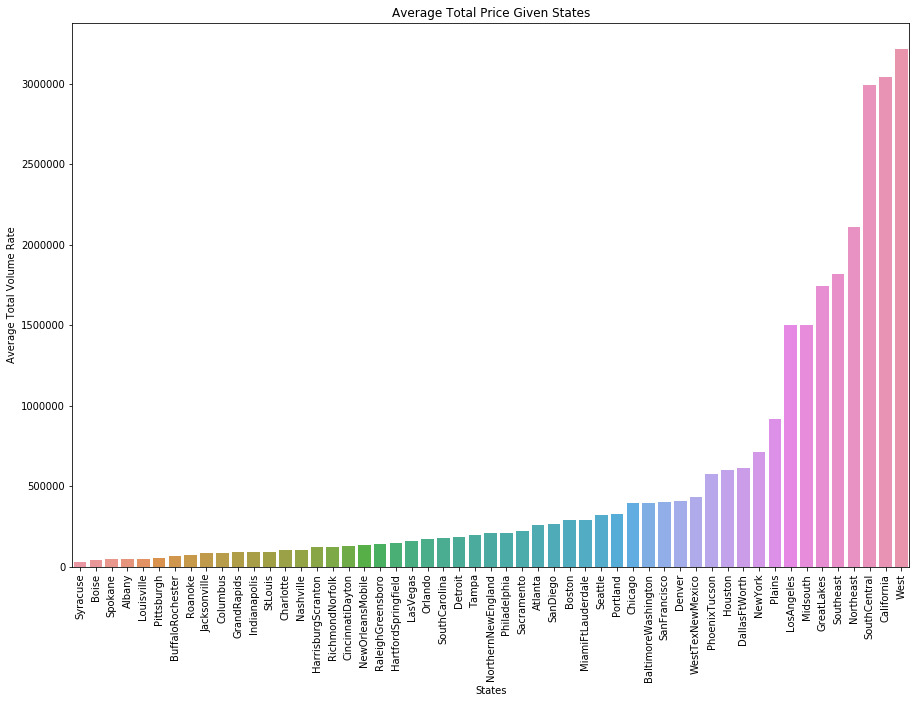

In [10]:
area_list=list(data2.region.unique())
area_totalvolume_ratio=[]
for i in area_list:
    x=data2[data2.region==i]
    area_totalvolume_rate=sum(x['Total Volume'])/len(x)
    area_totalvolume_ratio.append(area_totalvolume_rate)
df=pd.DataFrame({'area_list':area_list, 'area_totalvolume_ratio':area_totalvolume_ratio})
new_index=df['area_totalvolume_ratio'].sort_values(ascending=True).index.values
sorted_data2=df.reindex(new_index)

plt.figure(figsize=(15,10))
sns.barplot(x=sorted_data2['area_list'], y=sorted_data2['area_totalvolume_ratio'])
plt.xticks(rotation= 90)
plt.xlabel('States')
plt.ylabel('Average Total Volume Rate')
plt.title('Average Total Price Given States')



[Text(0, 0.5, 'States'),
 Text(0.5, 0, 'Percentage of Races'),
 Text(0.5, 1.0, "Percentage of State's Size of Bags")]

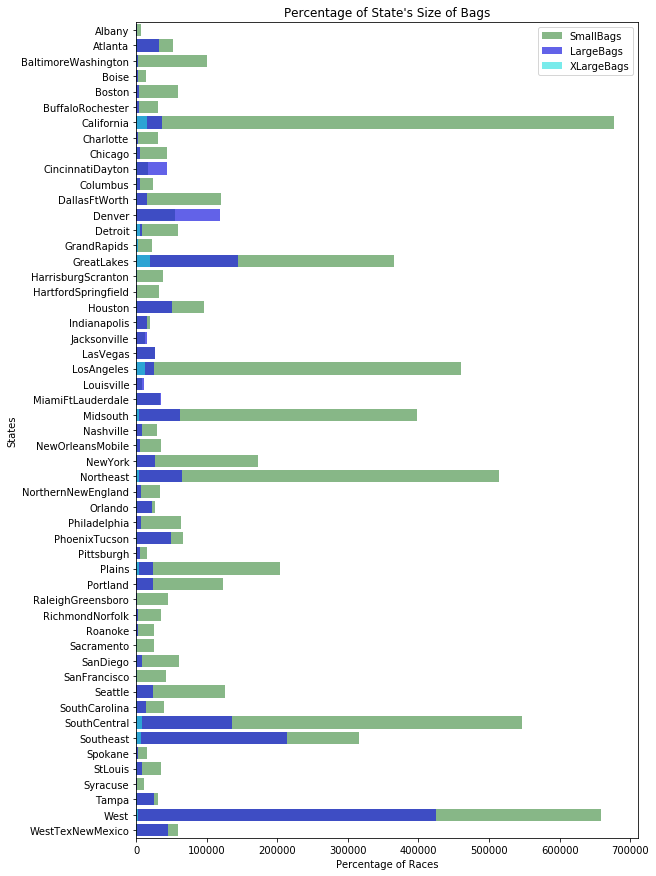

In [12]:
area_list=list(data2.region.unique())
SmallBags=[]
LargeBags=[]
XLargeBags=[]

for i in area_list:
    x=data2[data2.region==i]
    SmallBags.append(sum(x['Small Bags'])/len(x))
    LargeBags.append(sum(x['Large Bags'])/len(x))
    XLargeBags.append(sum(x['XLarge Bags'])/len(x))
    
f,ax = plt.subplots(figsize = (9,15))
sns.barplot(x=SmallBags,y=area_list,color='green',alpha = 0.5,label='SmallBags' )
sns.barplot(x=LargeBags,y=area_list,color='blue',alpha = 0.7,label='LargeBags')
sns.barplot(x=XLargeBags,y=area_list,color='cyan',alpha = 0.6,label='XLargeBags')
ax.legend(loc='upper right',frameon = True)     # legendlarin gorunurlugu
ax.set(xlabel='Percentage of Races', ylabel='States',title = "Percentage of State's Size of Bags")

Text(0.5, 1.0, 'Average Price  VS  Total Volume')

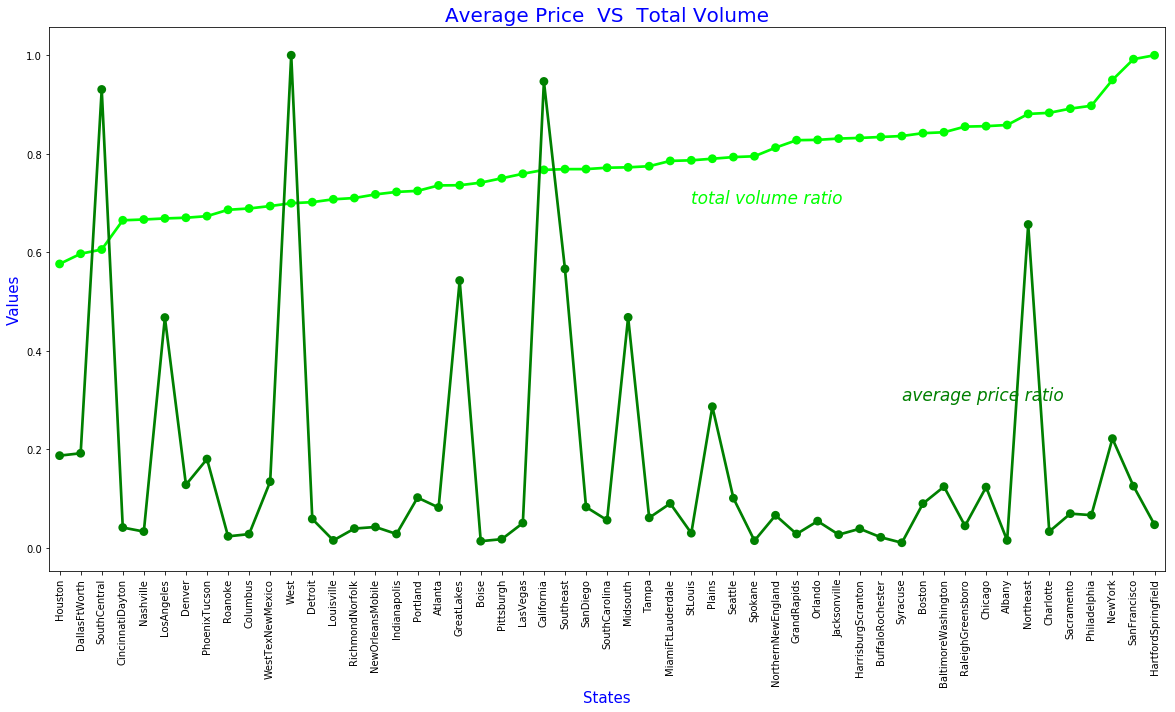

In [13]:

area_list=list(data2.region.unique())
sorted_data['area_averageprice_ratio']=sorted_data['area_averageprice_ratio']/max(sorted_data['area_averageprice_ratio'])
sorted_data2['area_totalvolume_ratio']=sorted_data2['area_totalvolume_ratio']/max(sorted_data2['area_totalvolume_ratio'])
new_data=pd.concat([sorted_data,sorted_data2['area_totalvolume_ratio']],axis=1)
new_data.sort_values('area_averageprice_ratio',inplace=True)

f,ax1=plt.subplots(figsize=(20,10))
sns.pointplot(x='area_list',y='area_averageprice_ratio',data=new_data,color='lime',alpha=0.5)
sns.pointplot(x='area_list',y='area_totalvolume_ratio',data=new_data,color='green',alpha=0.5)
plt.text(40,0.3,'average price ratio',color='green',fontsize = 17,style = 'italic')
plt.text(30,0.7,'total volume ratio',color='lime',fontsize = 17,style = 'italic')
plt.xlabel('States',fontsize = 15,color='blue')
plt.ylabel('Values',fontsize = 15,color='blue')
plt.xticks(rotation= 90)

plt.title('Average Price  VS  Total Volume',fontsize = 20,color='blue')


In [14]:
new_data.head()

,area_list,area_averageprice_ratio,area_totalvolume_ratio
18,Houston,0.576216,0.186945
11,DallasFtWorth,0.596925,0.191777
45,SouthCentral,0.605531,0.930529
9,CincinnatiDayton,0.664893,0.040967
26,Nashville,0.666488,0.032768


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


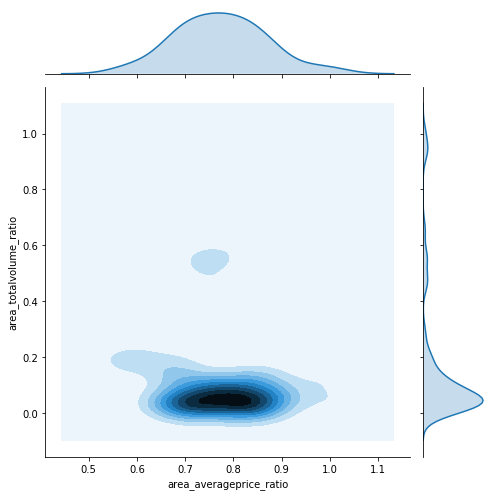

In [21]:
g = sns.jointplot(new_data.area_averageprice_ratio,new_data.area_totalvolume_ratio,kind="kde",height=7)
plt.savefig("graph.png")
plt.show()

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


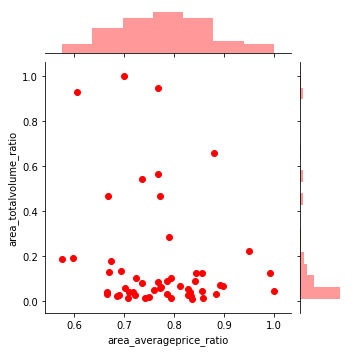

In [22]:
g = sns.jointplot("area_averageprice_ratio","area_totalvolume_ratio",data=new_data,height=5,ratio=5,color="r")

In [23]:
data_SD=data2[(data2.region=='LosAngeles') & (data2.AveragePrice<2)]
data_SD.type.value_counts()

conventional    169
organic         152
Name: type, dtype: int64

Text(0.5, 1.0, 'Types ')

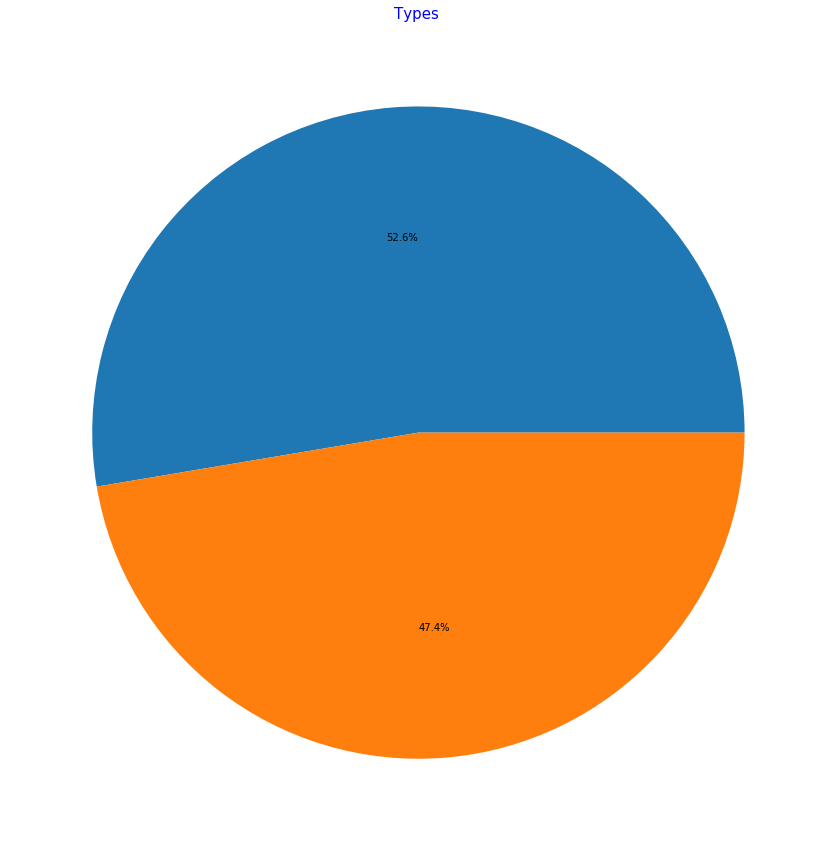

In [24]:



sizes=data_SD['type'].value_counts().values

plt.figure(figsize=(15,15))
plt.pie(sizes,autopct='%1.1f%%',rotatelabels = True)
plt.title('Types ',color='blue',fontsize=15)


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


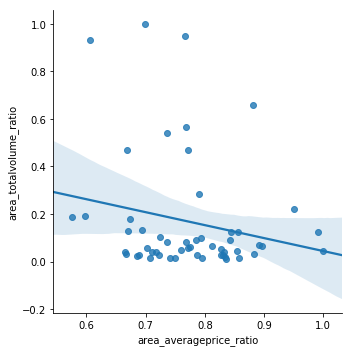

In [25]:
sns.lmplot(x="area_averageprice_ratio",y="area_totalvolume_ratio",data=new_data)
plt.show()

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


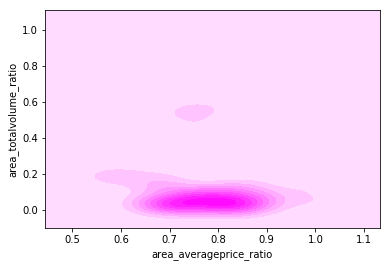

In [26]:
sns.kdeplot(new_data.area_averageprice_ratio,new_data.area_totalvolume_ratio,color='magenta',shade=True,cut=3)
plt.show()

In [ ]:
data2.head()

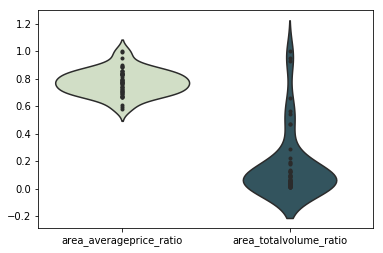

In [27]:
pal = sns.cubehelix_palette(2, rot= -.5, dark= .3)
sns.violinplot(data=new_data,palette=pal,inner="points")
plt.show()

In [28]:
new_data.corr()

,area_averageprice_ratio,area_totalvolume_ratio
area_averageprice_ratio,1.000000,-0.203629
area_totalvolume_ratio,-0.203629,1.000000


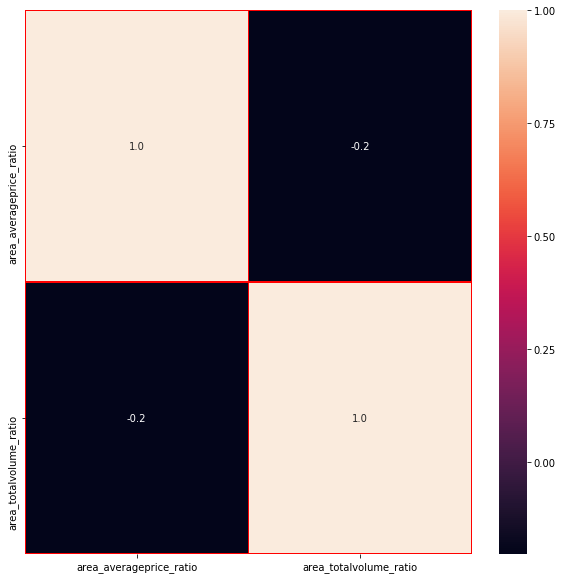

In [29]:
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(new_data.corr(),annot=True,linewidths=0.5,linecolor="red",fmt='.1f',ax=ax)
plt.show()

In [30]:
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


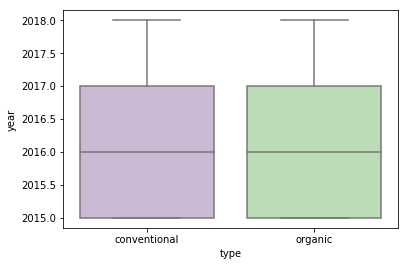

In [31]:
sns.boxplot(x="type", y="year" ,data=data, palette="PRGn")
plt.show()

In [32]:
#sns.swarmplot(x="type", y="year" ,data=data, palette="PRGn")
#plt.show()

In [33]:
new_data.head()

,area_list,area_averageprice_ratio,area_totalvolume_ratio
18,Houston,0.576216,0.186945
11,DallasFtWorth,0.596925,0.191777
45,SouthCentral,0.605531,0.930529
9,CincinnatiDayton,0.664893,0.040967
26,Nashville,0.666488,0.032768


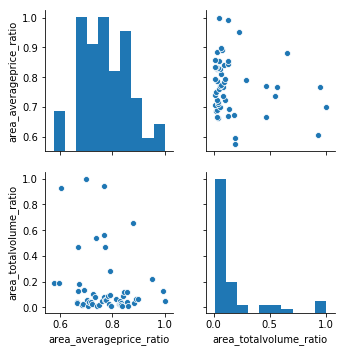

In [34]:
sns.pairplot(new_data)
plt.show()

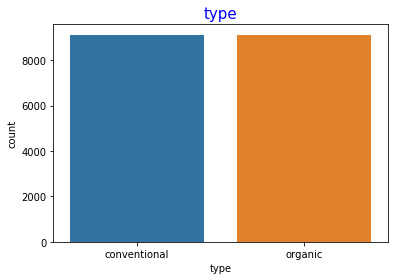

In [35]:
sns.countplot(data.type)
plt.title("type",color = 'blue',fontsize=15)
plt.show()

Text(0.5, 1.0, 'type of avocado')

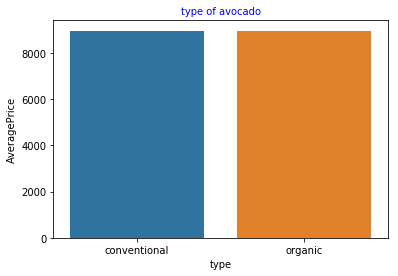

In [36]:
organic = ['organic' if i=='organic'  else 'conventional' for i in data2.type]
df = pd.DataFrame({'type':organic})
sns.countplot(x=df.type)
plt.ylabel('AveragePrice')
plt.title('type of avocado', color='blue',fontsize=10)

to be countinued...